<a href="https://colab.research.google.com/github/vinthegreat84/ML-Lab/blob/main/04_K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necessary libraries
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
# load the data
link = 'https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/12_sample_data.csv'
data = pd.read_csv(link)
data.head()

,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI
0,1,50.0,900.0,1.0,0.220761,140.021266,3413.063944
1,2,50.0,850.0,1.0,0.237154,39.837129,3074.562617
2,3,50.0,800.0,1.0,0.234352,84.992437,2292.783358
3,4,50.0,750.0,1.0,0.244553,90.632307,2494.848885
4,5,50.0,700.0,1.0,0.231787,811.547979,2522.063995


In [ ]:
# Summary Statistics
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,480.0,402.064583,248.064403,1.000000,170.500000,412.000000,620.500000,826.000000
X,480.0,430.187500,263.832692,0.000000,200.000000,390.000000,630.000000,980.000000
Y,480.0,522.166667,284.293420,19.000000,279.000000,539.000000,759.000000,999.000000
Facies,480.0,0.616667,0.486706,0.000000,0.000000,1.000000,1.000000,1.000000
Porosity,480.0,0.189440,0.031702,0.117562,0.165884,0.185443,0.216513,0.261091
Perm,480.0,520.932093,1226.207190,0.005776,6.539988,49.451463,369.470756,10319.904849
AI,480.0,3758.879653,779.990582,1746.387548,3212.900121,3719.883000,4236.160395,6194.573653


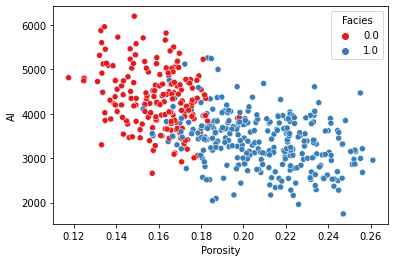

In [ ]:
# Visualization of Loaded Data
sns.scatterplot(x = 'Porosity', y = 'AI', hue='Facies',data=data, legend='full',palette = "Set1")

Silhouette Score:  0.7212705593918749
Calinski Harabasz Score:  522.1369416868491
Davies Bouldin Score:  0.5896446661916207


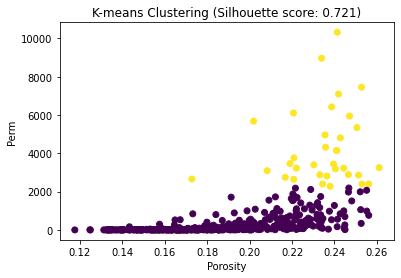

In [ ]:
# Extract the features and target
X = data[["Porosity", "Perm", "AI"]]
y = data["Facies"]

# Create an instance of the KMeans model
kmeans = KMeans(n_clusters=2)

# Fit the model to the data
kmeans.fit(X)

# Predict the clusters for each data point
y_pred = kmeans.predict(X)

# Calculate the silhouette score
score = silhouette_score(X, y_pred)

# Evaluation Metrics
print("Silhouette Score: ", silhouette_score(X, y_pred))
print("Calinski Harabasz Score: ", calinski_harabasz_score(X, y_pred))
print("Davies Bouldin Score: ", davies_bouldin_score(X, y_pred))

# Plot the performance of the model
plt.scatter(X["Porosity"], X["Perm"], c=y_pred)
plt.xlabel("Porosity")
plt.ylabel("Perm")
plt.title("K-means Clustering (Silhouette score: {:.3f})".format(score))
plt.show()